###  PROBLEM STATEMENT : Predict the percentage of a student based on the no. of study hours.

### **Importing the libraries**

In [1]:
# Importing all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Collecting and Reading The Data

In [2]:
# Reading data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### <b> Data Description</b>



<b>Hours</b> : Continuous Predictor Variable

<b>Score</b> : Continuous <b>Target</b> Variable

### <b>Plotting and visualizing the Data</b>

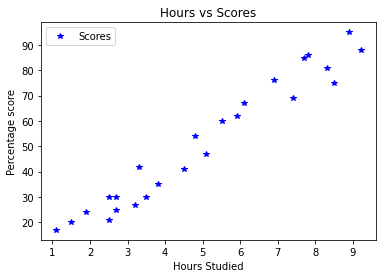

In [3]:
# PLotting the graph of scores
df.plot(x='Hours',y='Scores',style='*',color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

<b>The above graph clearly shows that there is a positive correlation between hours and percentage</b>

### <b>Observing The Distribution Of the Continuous Variables</b>

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

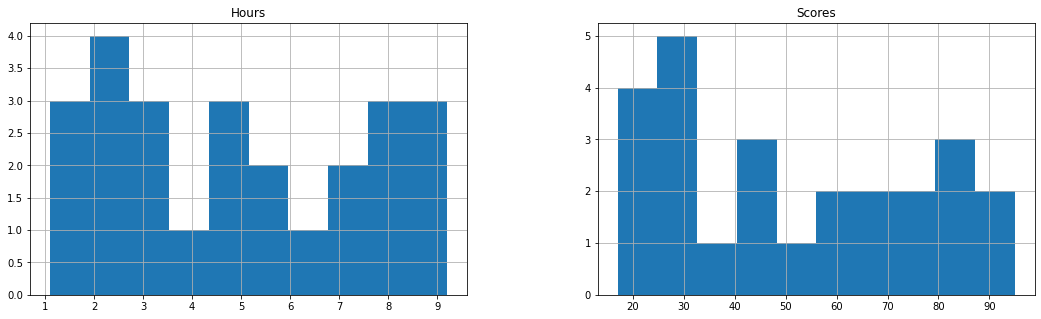

In [53]:
df.hist(['Hours','Scores'],figsize=(18,5))

In [74]:
round(df.describe(),2)

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


In [18]:
df.nunique()

Hours     23
Scores    23
dtype: int64

### <b>Checking Missing Values</b>

In [54]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [19]:
# We can also use corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### <b> Preparing The Data</b>

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [20]:
X=df.iloc[:,:-1].values #all rows and col except last col
Y=df.iloc[:,1].values  #all rows and only 1st col i.e scores

In [21]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### <b>Splitting The Data Into Training and Testing Data</b>

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42000)

### <B>Training the Algorithm   </B>

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


### Plotting The Regression Line

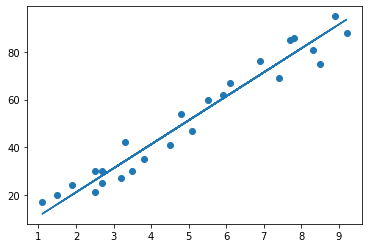

In [34]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### <B>Predicting On Test Data</B>

Now that we have trained our algorithm, it's time to make some predictions.

In [35]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [7.4]
 [2.7]
 [1.1]
 [6.1]]


 ### **Comparing Actual vs Predicted Results**


In [68]:
# Comparing Actual vs Predicted
ds = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
ds

,Actual,Predicted
0,81,84.554120
1,69,75.485128
2,30,28.124837
3,17,12.002185
4,67,62.385473


### <b>Plotting a bar graph to see the difference between actual and predicted value</b>

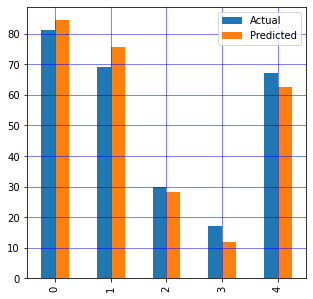

In [69]:
ds.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='blue')
plt.grid(which='minor',linewidth='0.5',color='red')
plt.show()

### <b> Prediction of score when a student studies for 9.25 hours </b>

In [72]:
# test with your own data
Hours = [[9.25]] #predict takes 2D array 
own_pred = regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.12694533229262


### <b>Mean Absolute Error</b>



In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.30535078118527


### <b>Conclusion: When a student studies for 9.25 hours per day , the prediction score will be 94% </b>

### THANK YOU!!!